
# <span style="color:rgb(213,80,0)">Solar Panel Output Estimator</span>

Specify the location of your panels.


In [1]:
% Calculate Solar Time
location = [42.35 -71.0589 -5];
[lambda, phi, UTCoff, TZ, localYear, localMonth, localDay, beta, tau, pRad] = solTime(location);



Specify the panel size and efficiency value.


In [2]:
% Calculate Panel Size and Efficiency
pSize = 17;                          % Panel size in m^2
eff = 60;                         % Panel efficiency
pElec = eff*pSize*pRad;                                    % Panel electric output in kW


### Results:

In [3]:
disp(['Expected electrical output = ' num2str(pElec) ' kW'])

Expected electrical output = 916.8498 kW


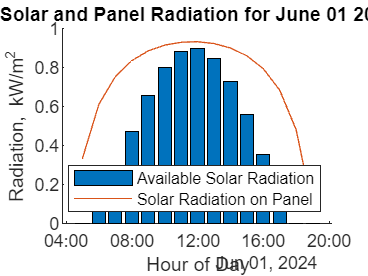

In [4]:
clf
% Calculate Power Generation Over Time
isFixed = 1;
date = datetime(localYear,localMonth,localDay,'TimeZone',TZ);
[times, sRad, pRad] = hourlyPanelRadiation(date, lambda, phi, UTCoff, tau, beta, isFixed) ;
hold on
bar(times,pRad)
title(['Solar and Panel Radiation for ' datestr(date,'mmmm dd yyyy')])
plot(times,sRad)
xlabel('Hour of Day');
ylabel('Radiation, kW/m^2')
legend('Available Solar Radiation','Solar Radiation on Panel', 'Location','South')
hold off

In [5]:
function [lambda, phi, UTCoff, TZ, localYear, localMonth, localDay, beta, tau, pRad] = solTime(location)
lambda = location(2);                                      % Longitude
phi = location(1);                                         % Latitude
UTCoff = location(3);                                      % UTC offset
if(UTCoff < 0)
    TZ = ['UTC' num2str(UTCoff)];
else
    TZ = ['UTC+' num2str(UTCoff)];
end

january1  = datetime(2024,1,1,'TimeZone',TZ);              % January 1st

localYear = 2024;
localMonth = 6;
localDay = 1;
localHour = 12;
localTime = datetime(localYear,localMonth,localDay,localHour,0,0,'TimeZone',TZ);

d = caldays(between(january1,localTime,'Day'));            % Day of year
solarCorr = solarCorrection(d,lambda,UTCoff);              % Correction to local time
solarTime = localTime + minutes(solarCorr);

% Calculate Solar Declination and Elevation
delta = asind(sind(23.45)*sind(360*(d - 81)/365));          % Declination
omega = 15*(solarTime.Hour + solarTime.Minute/60 - 12);     % Hour angle
alpha = asind(sind(delta)*sind(phi) + ...                   % Elevation
    cosd(delta)*cosd(phi)*cosd(omega));

% Calculate Air Mass and Solar Radiation
AM = 1/(cosd(90-alpha) + 0.50572*(6.07955+alpha)^-1.6354);
sRad = 1.353*0.7^(AM^0.678);                                % kW/m^2

% Calculate Solar Radiation on Fixed Panels
gamma = acosd((sind(delta)*cosd(phi) - cosd(delta)*sind(phi)*cosd(omega))/cosd(alpha));
if (hour(solarTime) >= 12) && (omega >= 0)
    gamma = 360 - gamma;
end
beta = 180;                                                 % Panel azimuth
tau = 35;                                                   % Panel tilt
pRad = sRad*max(0,(cosd(alpha)*sind(tau)*cosd(beta-gamma) + sind(alpha)*cosd(tau)));
end


 ** To view the code for this example, go to the* ***View*** *tab and click* ***Output on Right*** *or* ***Output Inline****.*


*Copyright 2019 The MathWorks, Inc.*

